## This is a marketing dataset of the bank.
The dataset contains information on various marketing campaigns of a bank. The objective is to predict whether a client will subscribe to a term deposit based on different variables. These variables include client demographics, previous marketing campaign results, and other relevant factors.

In [210]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
df=pd.read_csv('./bank-additional-full.csv',sep=";")

In [212]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [213]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [214]:
df.info()
#We can see the data are already cleaned-all are non-null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [215]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.What is the distribution of term deposit subscriptions by age?

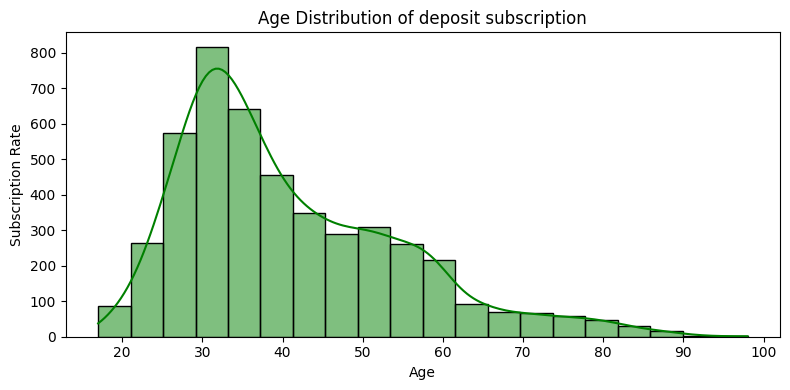

In [216]:
plt.figure(figsize=(8, 4))
sns.histplot(df[df['y'] == 'yes']['age'], bins=20, kde=True, color='green')
plt.title('Age Distribution of deposit subscription')
plt.xlabel('Age')
plt.ylabel('Subscription Rate')
plt.tight_layout()
plt.show()

## Conclusion
From the above plot, we can see customers being in their 30s have a higher likelihood of subscribing to a term deposit compared to other age groups.

In [217]:
df_filtered = df[df['y'] == 'yes']

# 2.Which job types are most likely to subscribe in term deposit?

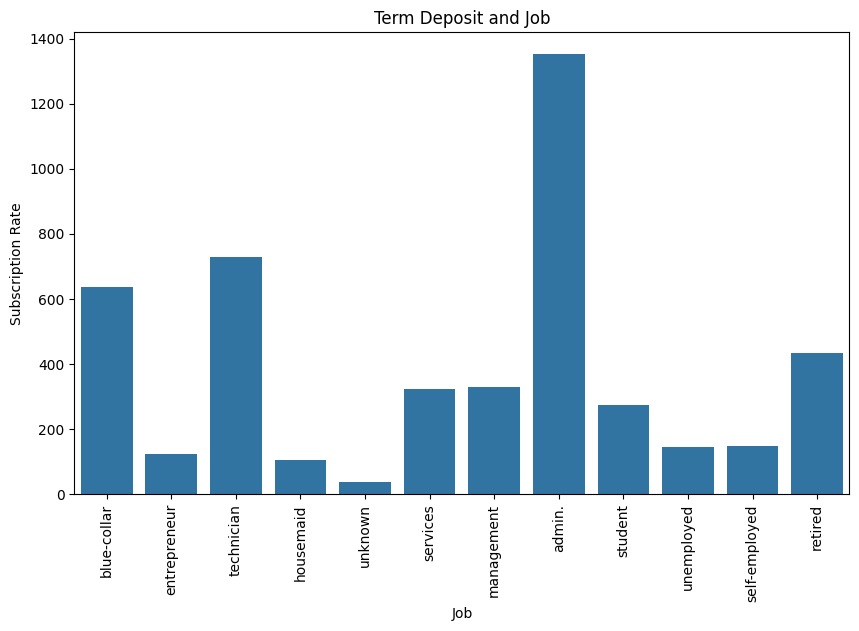

In [218]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='job', data=df_filtered)
ax.set_title('Term Deposit and Job')
ax.set_xlabel('Job')
ax.set_ylabel('Subscription Rate')
plt.xticks(rotation=90)
plt.show()

The plot indicates that customers with job types 'admin' and 'technician' have higher subscription rates for term deposits compared to other job types. Conversely, job types like 'housemaid' and 'entrepreneur' show lower subscription rates.

# 3.How does marital status of customer affect subscription rate?

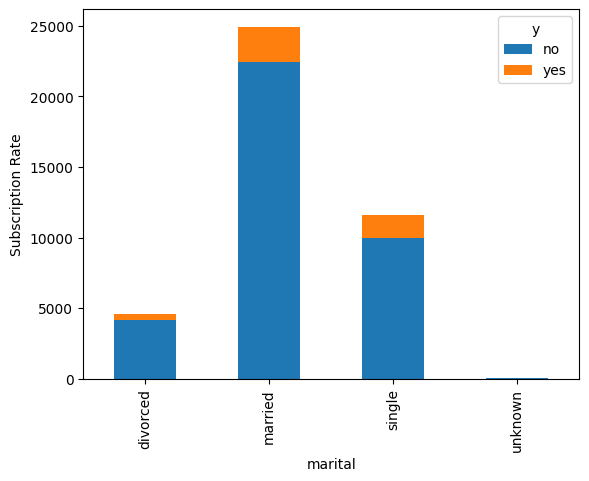

In [219]:
df_pivot = df.pivot_table(index='marital', columns='y', aggfunc='size', fill_value=0)
df_pivot.plot(kind='bar', stacked=True)
plt.ylabel('Subscription Rate')
plt.show()

In [220]:
print(df['marital'].value_counts())
print(len(df['marital']))

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
41188


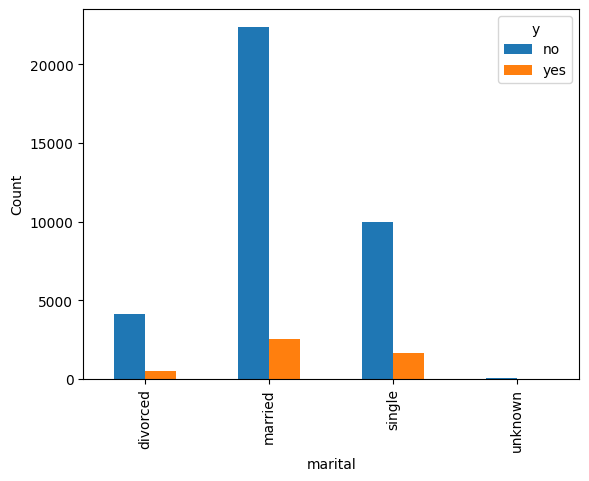

In [221]:
df_pivot = df.pivot_table(index='marital', columns='y', aggfunc='size', fill_value=0)
df_pivot.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.show()

In [222]:
percentage_married = round((df_filtered['marital'].value_counts()['married'] /df['marital'].value_counts()['married'] ) * 100, 2)
print("Married customers subscribing term deposit percentage",percentage_married)
percentage_single = round((df_filtered['marital'].value_counts()['single'] /df['marital'].value_counts()['single'] ) * 100,2)
print("Single customers subscribing term deposit percentage",percentage_single)
percentage_divorced = round((df_filtered['marital'].value_counts()['divorced'] /df['marital'].value_counts()['divorced'] ) * 100,2)
print("Divorced customers subscribing term deposit percentage",percentage_divorced)

Married customers subscribing term deposit percentage 10.16
Single customers subscribing term deposit percentage 14.0
Divorced customers subscribing term deposit percentage 10.32


Text(0.5, 1.0, 'Term Deposit Subscription (Divorced)')

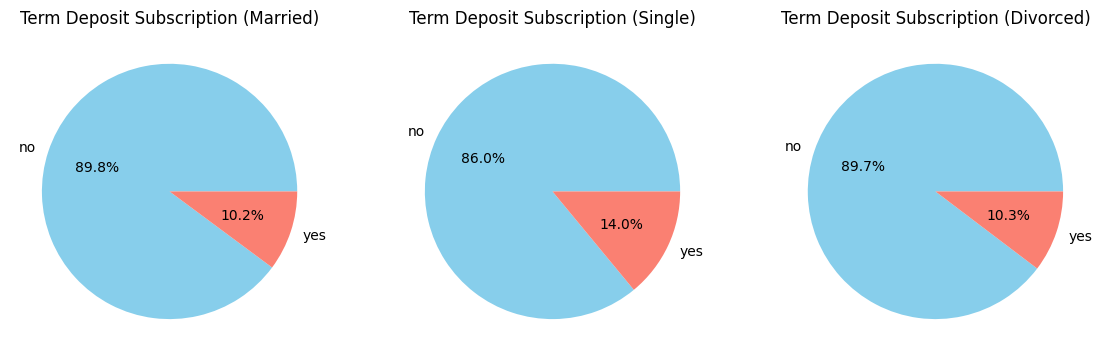

In [223]:
married = df[df['marital'] == 'married']
single = df[df['marital'] == 'single']
divorced = df[df['marital'] == 'divorced']

married_counts = married['y'].value_counts()
single_counts = single['y'].value_counts()
divorced_counts = divorced['y'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(14, 7))

axes[0].pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[0].set_title('Term Deposit Subscription (Married)')

axes[1].pie(single_counts, labels=single_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[1].set_title('Term Deposit Subscription (Single)')

axes[2].pie(divorced_counts, labels=divorced_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[2].set_title('Term Deposit Subscription (Divorced)')

The bar chart and stacked bar chart show that married individuals are the largest group. When we see the pie chart of subscribing term deposit with their total distribution, we can see that single customers have higher possibility.

# 4.Will the customers' education affect the term deposit rate?

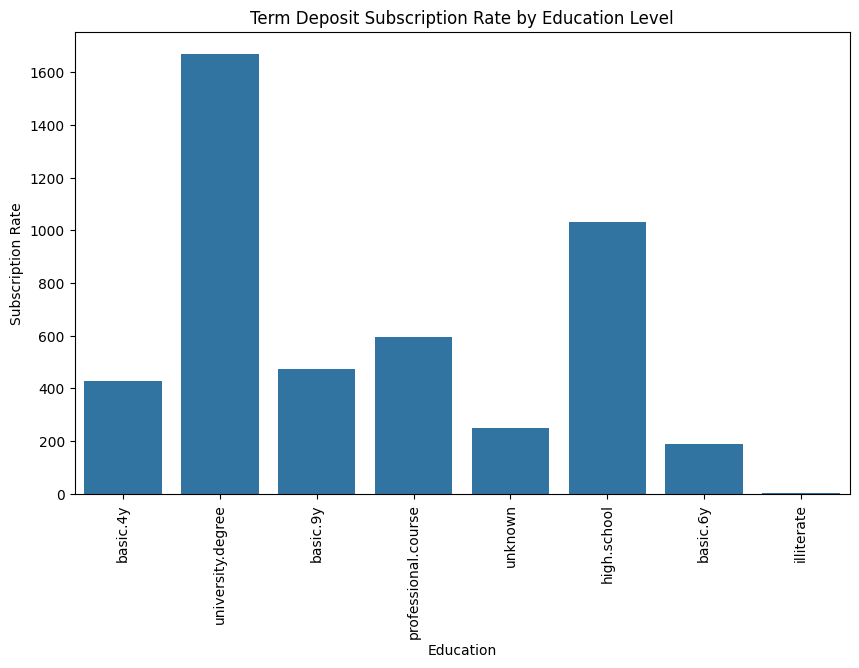

In [224]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='education', data=df_filtered)
ax.set_title('Term Deposit Subscription Rate by Education Level')
ax.set_xlabel('Education')
ax.set_ylabel('Subscription Rate')
plt.xticks(rotation=90)
plt.show()

The bar chart illustrates that customers with university degree tend to have a higher subscription rate for term deposits compared to other groups. This indicates that education level may influence the likelihood of subscribing to a term deposit.

## 5. How does having default history affect term deposit?
A default occurs when a borrower fails to meet the legal obligations of a loan, typically by not making the required payments.

In [225]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

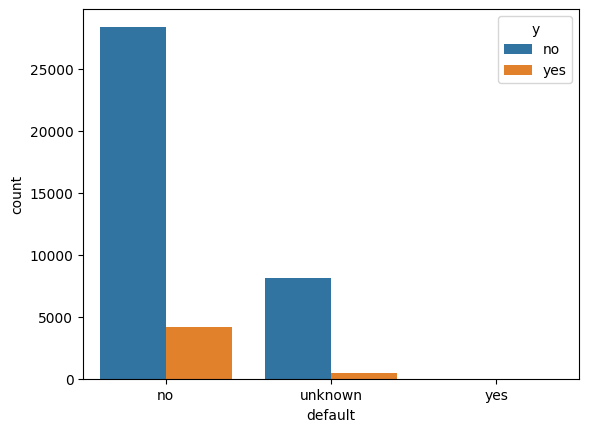

In [226]:
sns.countplot(x='default', hue='y', data=df)
plt.show()

In [227]:
no_default_history = round((df_filtered['default'].value_counts()['no'] /df['default'].value_counts()['no'] ) * 100, 2)
print("Customers with no default history subscribing term deposit percentage",no_default_history)
unknown_default_history = round((df_filtered['default'].value_counts()['unknown'] /df['default'].value_counts()['unknown'] ) * 100, 2)
print("Customers with unknown default history subscribing term deposit percentage",unknown_default_history)

Customers with no default history subscribing term deposit percentage 12.88
Customers with unknown default history subscribing term deposit percentage 5.15


Text(0.5, 1.0, 'Term Deposit Subscription (Unknown Default History)')

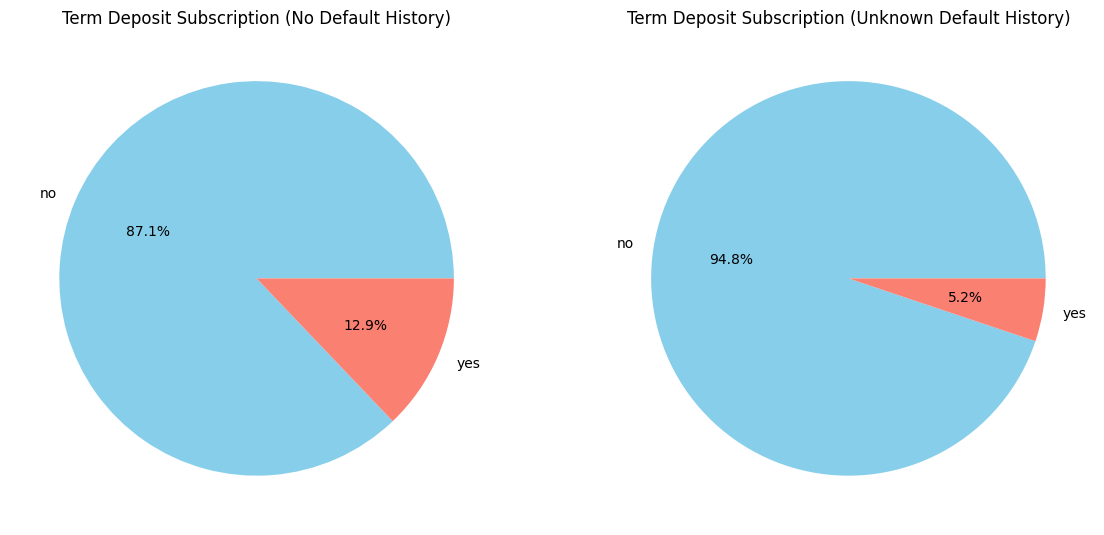

In [228]:
no_default = df[df['default'] == 'no']
unknown_default = df[df['default'] == 'unknown']

no_default_counts = no_default['y'].value_counts()
unknown_default_counts = unknown_default['y'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(no_default_counts, labels=no_default_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[0].set_title('Term Deposit Subscription (No Default History)')

axes[1].pie(unknown_default_counts, labels=unknown_default_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[1].set_title('Term Deposit Subscription (Unknown Default History)')

From bar chart, it's clear that the customer with no default history is the large group in the dataset and according to the pie chart, they have high possibly in subscribing term deposit.

# 6. What is the influence between housing loan status and personal loan on term deposit?

## Personal loan

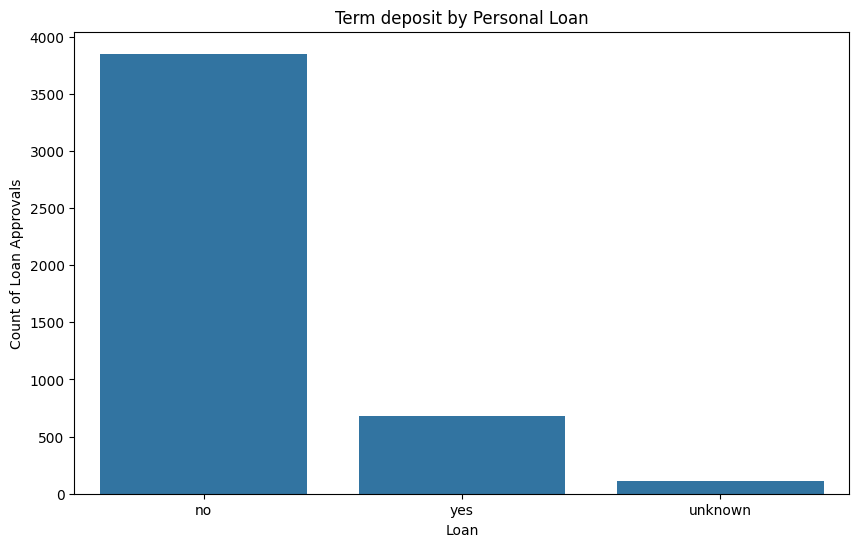

In [229]:
df_filtered = df[df['y'] == 'yes']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='loan', data=df_filtered)
ax.set_title('Term deposit by Personal Loan')
ax.set_xlabel('Loan')
ax.set_ylabel('Count of Loan Approvals')
plt.show()

The bar chart indicates that customers without a personal loan have a higher subscription rate for term deposits compared to those with a personal loan yes and unknown. This suggests that having a personal loan might negatively influence the likelihood of subscribing to a term deposit.

## Housing loan

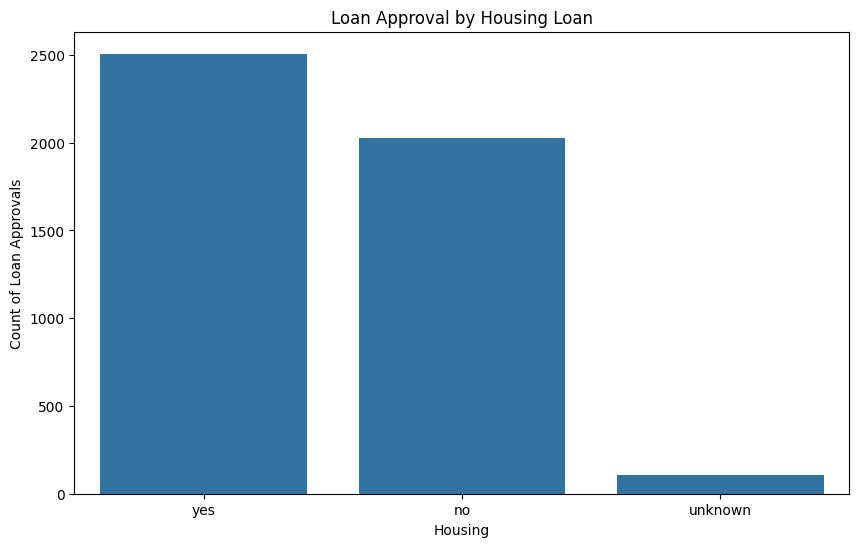

In [230]:
df_filtered = df[df['y'] == 'yes']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='housing', data=df_filtered)
ax.set_title('Loan Approval by Housing Loan')
ax.set_xlabel('Housing')
ax.set_ylabel('Count of Loan Approvals')
plt.show()

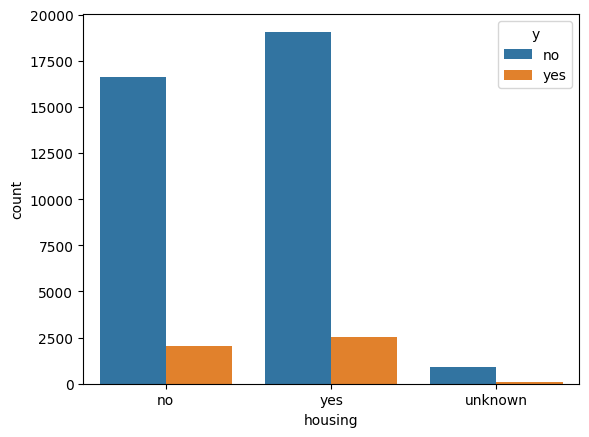

In [231]:
sns.countplot(x='housing', hue='y', data=df)
plt.show()

In [232]:
counts = df['housing'].value_counts()
counts

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

Text(0.5, 1.0, 'Term Deposit Subscription (Yes Housing Loan)')

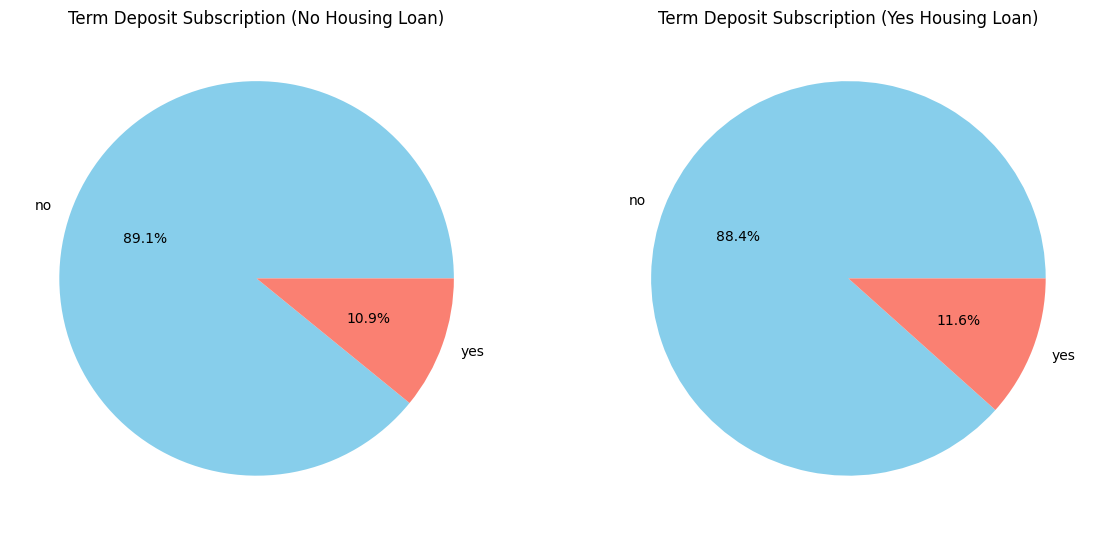

In [233]:
df_no_housing = df[df['housing'] == 'no']
df_yes_housing = df[df['housing'] == 'yes']

no_housing_counts = df_no_housing['y'].value_counts()
yes_housing_counts = df_yes_housing['y'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(no_housing_counts, labels=no_housing_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[0].set_title('Term Deposit Subscription (No Housing Loan)')

axes[1].pie(yes_housing_counts, labels=yes_housing_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[1].set_title('Term Deposit Subscription (Yes Housing Loan)')

The bar chart show people with housing loan is the major group and the pie charts illustrate that customers without housing loan tend to have a higher subscription rate for term deposits.

# 7. Which contact communication type is most effective for term deposit?

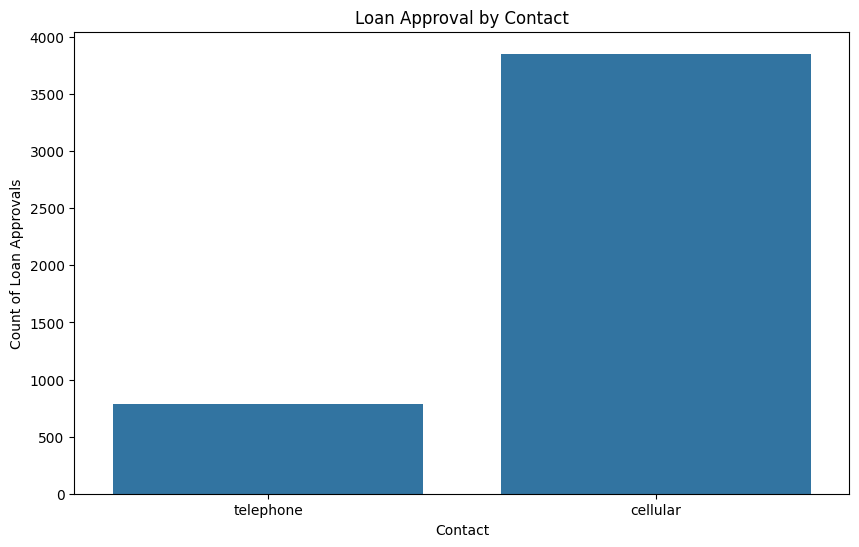

In [234]:
df_filtered = df[df['y'] == 'yes']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='contact', data=df_filtered)
ax.set_title('Loan Approval by Contact')
ax.set_xlabel('Contact')
ax.set_ylabel('Count of Loan Approvals')
plt.show()

The chart shows that the customer with cellular contact have high possibly in subscribing term deposit.

In [235]:
df["term_deposit"]=df["y"].apply(lambda x:1 if x=="yes" else 0)

# 8. How do term deposit subscription vary by month and day of the week?

## Term deposit subscription by days

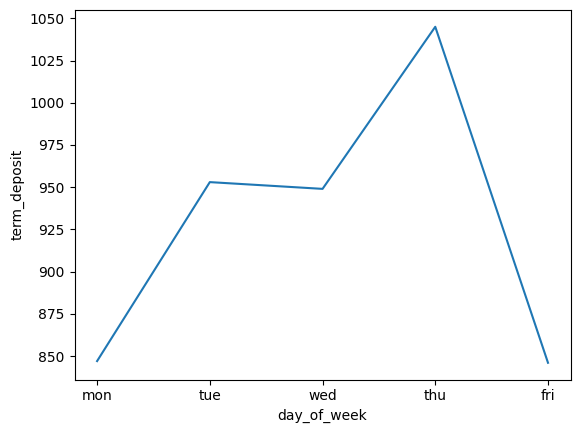

In [236]:
days_order = ['mon', 'tue', 'wed', 'thu', 'fri']
sum_approval = df.groupby('day_of_week')['term_deposit'].sum().reset_index()
sum_approval['day_of_week'] = pd.Categorical(sum_approval['day_of_week'], categories=days_order, ordered=True)
sns.lineplot(x = "day_of_week",y="term_deposit",data=sum_approval)
plt.show()

The line chart indicate variations in term deposit subscription rates based on the day of the week. For the day like Tue, Wed and Thursday, it show higher subscription rates, which may indicate patterns related to customer behavior or bank marketing efforts.

## Term deposit subscription by month

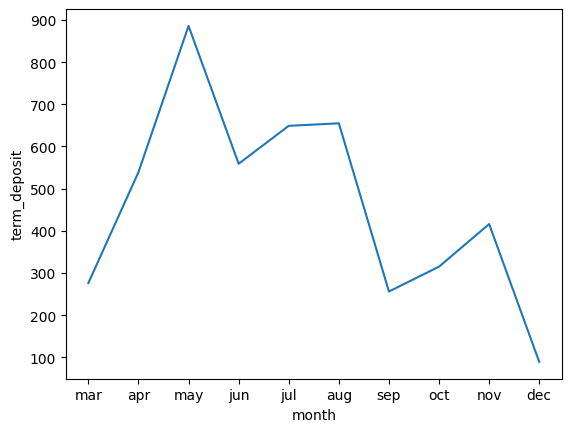

In [237]:
month_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
month_sum_approval = df.groupby('month')['term_deposit'].sum().reset_index()
month_sum_approval['month'] = pd.Categorical(month_sum_approval['month'], categories=month_order, ordered=True)
sns.lineplot(x = "month",y="term_deposit",data=month_sum_approval)
plt.show()

The line chart indicate variations in term deposit subscription rates based on month. In May, it show higher subscription rates and conversely, december has lowest subscription rates.

# 9. What is the average marketing campaign duration for term deposit?
The time for interaction between the bank's representative and the client

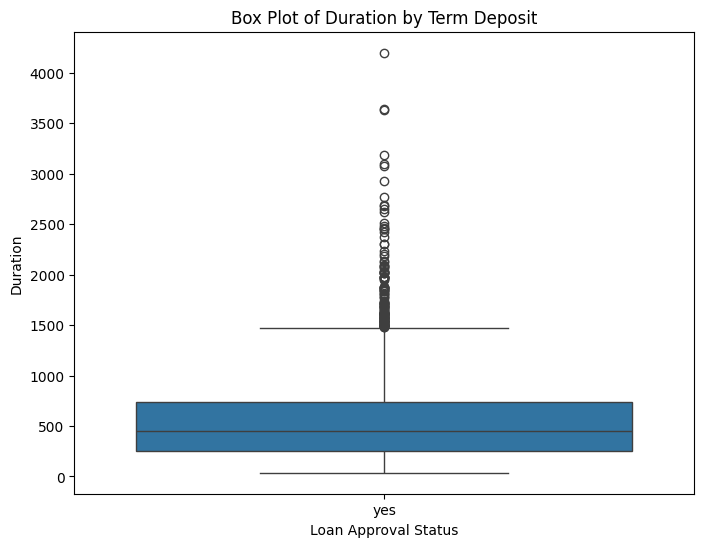

In [238]:
import numpy as np
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=df_filtered)

# Adding titles and labels
plt.title('Box Plot of Duration by Term Deposit')
plt.yticks(np.arange(0, 4500, 500))
plt.xlabel('Loan Approval Status')
plt.ylabel('Duration')
plt.show()

The box plot shows that customers who subscribe to a term deposit tend to have a mean duration around 500 seconds. Therefore, aiming for interaction durations around 500 seconds might be optimal for gaining customer interest in term deposits.

# 10. What is the effect of previous campaign outcomes on term deposit?
The number of contacts or attempts made with a client before the current campaign.

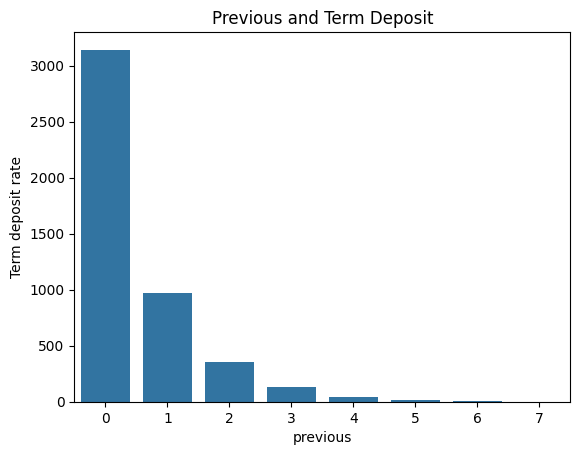

In [239]:
sum_deposit_rate = df.groupby('previous')['term_deposit'].sum().reset_index()

ax = sns.barplot(x='previous', y='term_deposit', data=sum_deposit_rate)

# Add titles and labels
ax.set_title('Previous and Term Deposit')
ax.set_xlabel('previous')
ax.set_ylabel('Term deposit rate')
plt.show()

The bar chart shows that the subscription rate varies with the number of previous contacts. It is clear that with no previous attempt, people have hight subscription rate. So, we can see that the customer contacts or attempts is more likely to subscribe term deposit.

In [240]:
sub_df=df[["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","term_deposit"]]

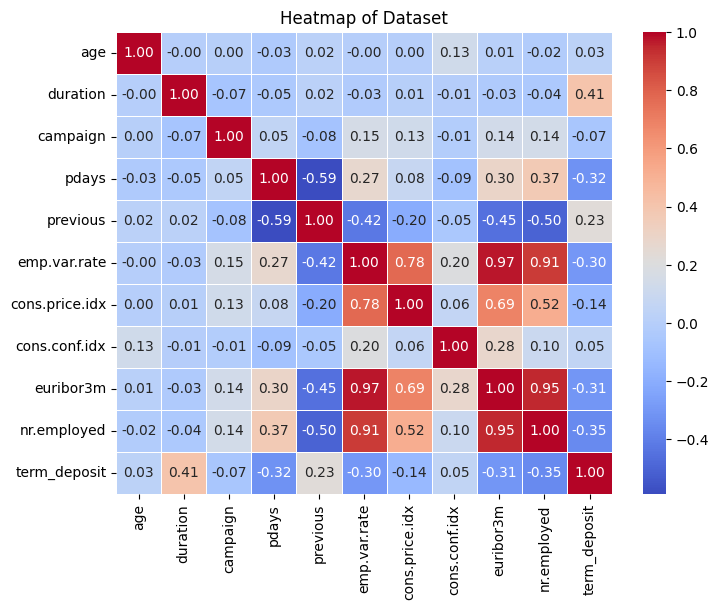

In [241]:
plt.figure(figsize=(8, 6))

# Creating the heatmap
sns.heatmap(sub_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Dataset')
plt.show()

When we explore the numerical data from the dataset, we can see duration influence on term deposit subscription a lot-41% from the heat map.
So, it is important that we can get the connection with customer to get them describe in term deposit. 